# Lab 6: Neural Networks and deep learning
Machine learning has seen a huge increase in interest in the past years, mainly due to breakthroughs in the field of **neural networks** and **deep learning**. This subfield is so popular right now that it has most of the things you heard about ML or AI in the popular media can be attributed to these models. They are however only a part of the machine learning field just like other families of models like SVMs. That being said, these models are extremely powerful when used correctly and have allowed for huge breakthroughs in image recognition, image segmentation, voice recognition, image generation and game play just in the past years. Many products and services like Google Translate, Siri or self-driving cars rely on deep learning. 

Neural Networks (NNs) are not exactly new, their origins can be dated back to 1943. Neural Networks were originally inspired by the animal brain even though they are only a very crude approximation. Modern Deep Neural Networks are much closer related to statistical regression techniques than to biological systems but they still take inspiration from the animal brain. The techniques used to train neural networks have also been known for quite a long time, dating back to 1975. So why do we only see these breakthroughs now ? The first reason why neural networks now are much more powerful than in the past has to do with the abundance of data that is available to learn from. Right now we generate 2.5 quintillion bytes of data each day. People uploading photos to social media and interacting with mobile devices generate a wealth of information that can be used to train more powerful machine learning models. Processing data at this scale requires compute infrastructure of a similar scale which brings us to the second crucial reason for the success of deep learning methods: powerful hardware implementations. A typical computer program runs on the **Central Processing Unit (CPU)** of the computer. A CPU can handle a wide variety of tasks and is extremely flexible. Deep neural networks however need many operations of the same type and these can be done efficiently in parallel by a **Graphics Processing Unit (GPU)**. GPUs were originally designed to accelerate the generation of output on a screen and high-end GPUs were almost exclusively reserved for playing video games. However, the operations that form the neural network can be very efficiently mapped to the GPU hardware. It is not uncommon to see a speedup of 40x for a GPU compared to a CPU. Together these two advances have enabled the breakthrough achievements we have witnessed in the last years.

Given enough training data and computational resources, deep neural networks are extremely powerful. They can be applied for classification and regression tasks and can be trained supervised, unsupervised or using reinforcement learning on different types of data such as images, video, audio, text, timeseries, ...
Deep learning is not without problems. Deep Neural Networks need large amounts of information to learn a specific task. Image recognition models are trained on millions of labelled images. Google’s AlphaGo model that defeated a professional Go player used hundreds of thousands of examples of human played games and millions of games played against itself. Secondly, the models generally lack interpretability. It is hard for a human to understand how a neural network actually performs a specific task. We understand the global mechanism but the details are hidden within the many parameters of the network. Neural network models are also very expensive to train and to evaluate.

## Neural network architectures
Researchers that apply deep neural networks have to design a suitable **architecture**. These neural networks are built by chaining multiple **layers** where each layer performs some **transformation** that is typically **learned from data**. The network then calculates as composed function $f(\mathbf{x}) = f^{(1)}(f^{(2)}(f^{(3)}(f^{(4)}(\mathbf{x}))))$.  The length of the chain is called the **depth** of the network. Neural network can have everything between 1 layer up to thousands for layers in very specific architectures.   The first layer that receives the input is called the **input layer** and the layer that returns the output is called the **output layer**. The layers in between are the **hidden layers**. Each layer is composed of hundreds of **neurons** that perform the basic operations.  The number of neurons in a layer is called the **width of the layer**. The neurons of different layers are connected and each connection has a **weight**. The network is trained by tweaking these weights using **gradient descent** to optimize a **loss function**. Most common architectures let the data flow in one direction. The neurons then define a **directed acyclical graph**. We call these networks **feedforward neural networks** or **multilayer perceptrons (MLP)**. It is however also possible to have **loops** and **recurrence**: **recurrent neural networks (RNN)**. These types of connections are typically used to process sequential data such as text or timeseries.

<div style="float:left">
<img src="images/mlp.png" width="750" />
    
source: https://towardsdatascience.com/designing-your-neural-networks-a5e4617027ed
</div>

We call these models **neural** because they were originally loosely inspired by how the  brain works with hierarchies of interconnected neurons. Some introductions use biological terms such as **soma** and **dendrite** to refer to the neurons or connections.  Modern neural network research however has little connection to biological neurons and instead relies more on mathematical en engineering insights. It is therefore better to approach these models as function approximation techniques than as a simulation of a biological system.

A good way to understand neural networks is to start from linear models such as **linear or logistic regression**. Linear models can only model linear relationships. If we need to model non-linear relationships we can use the **kernel trick** that transforms the features in a non-linear way. These **kernels** transform the input $\mathbf{x}$ to some other space $\phi(\mathbf(x))$. We can think of this new representation as a set of **features** that makes it easier to make predictions about the data. But how do we define these transformations ? The most straightforward options is to use **expert domain knowledge** to define features manually, which is what the computer vision community did for decades. We can also use very general features such as the **RBF-kernel**, which is what an SVM does. Deep neural networks on the other hand **learn the features from data**. This is what distinguishes **deep learning** from **shallow** models. This is shown in the figure below. The names are somewhat poorly chosen since deep learning is a subfield of machine learning and not an alternative. A better title would be "traditional machine learning".

<div style="float:left">
<img src="images/mldl.jpg" width="750" />
    
source: https://verhaert.com/difference-machine-learning-deep-learning/
</div>

## Neural network layers
A single layer in a neural network has a fixed set of neurons. Each neuron is connected to all neurons in the previous layer. Each connection has a **weight**. The neuron calculates the **weighted sum** of the input with each corresponding weight. Then this result is passed through a **non-linearity** called the **activation function**. It is this function that allows the network to learn **non-linear relationships**. Typical **activation functions** are **sigmoids**, **hyperbolic tangent (tanh)** or the **rectified linear unit (ReLU)**. We typically also include a **bias** either by adding a constant input of one or by adding a learned value to the output of each neuron.
<div style="float:left">
<img src="images/neuron.png" width="400" />
</div>
<div style="float:left">
<img src="images/activation.png" width="750" />
    
source: https://towardsdatascience.com/complete-guide-of-activation-functions-34076e95d044
</div>

<font color='red'>Task: Does this look familiar ? </font>

A single layer has more than one neuron (typically hundreds or thousands). Each of these neurons calculate a single value. The resulting vector is then given to the next layer as input. We can efficiently calculate all outputs using a matrix multiplication. This is the reason why **GPUs** are so suited for neural networks, they are able to perform the matrix multiplications much more efficiently in parallel than a sequential **CPU**. The formulas below show how this is done for a layer with three inputs and two neurons, resulting in two outputs.

$\mathbf{x} = \begin{bmatrix}
x_1  \\
x_2  \\
x_3
\end{bmatrix}$ (the input vector with three inputs)

$\mathbf{W} = \begin{bmatrix}
x_{11} & w_{12} & w_{13}  \\
x_{21} & w_{22} & w_{23}  \\ 
\end{bmatrix}$ (the weight matrix of a layer with three input and two neurons)

$\mathbf{b} = \begin{bmatrix}
b_1 \\
b_2 
\end{bmatrix}$ (the bias vector of a layer with two neurons)

$\mathbf{h} = f(\mathbf{x} \cdot \mathbf{W}  + \mathbf{b}) = \begin{bmatrix}
h_1 \\
h_2  \\
\end{bmatrix}$ (the activation of the layer. $f$ is the activation function)

As a neural network designer you are free to choose the depth and width of the network. If you increase the depth or width, you increase the **capactiy** of the model and this will hopefully result in a better performance. You however are also increasing the risk of **overfitting** of course the training time and computational cost will also increase. The input dimension of the first layer depends on the dimensionality of the input and the output dimension (the number of neurons) of the last layer depends on the dimensionality of the target. Neural network can be used for a variety of tasks, including binary or multi-label classification. In the case of N-class classification, the last layer will have *N* neurons, one for each class. The target is then also transformed into a **one-hot encoding**. In the case of 10-class classification our targets will then look like $[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]$. To rescale the predictions of the network into this range we typically use a **softmax function**
<div style="float:left">
<img src="images/softmax.png"  />
</div>

## Neural Network training
Neural networks are usually trained using **gradient descent**. The loss is however **non-convex** and gradient descent is not guaranteed to find a **global optimum**. In practice however, gradient descent works very well for these problems. Especially when using tricks such as **momentum**. There has gone much research into more advanced **update rules** such as **adam** and **RMSprop**. To calculate the gradient we use **backpropagation**. **backprop** is in fact nothing more than the **chain rule** it computes the gradient of the loss function with respect to the weights of the network for a single input/output example. Once we have these gradients, we know how to change the weight to reduce the loss. The good thing is we don't  have to calculate all **partial derivatives** of the composed functions ourselves. Modern deep learning toolkit rely on **automatic differentiation** to calculate them for us. Neural networks are typically trained on (very) large sets of data. Therefore we use **minibatches** of data to calculate the gradient.

<font color='red'>Task: We have used gradient descent before. What is the difference with using gradient descent for logistic regression and for neural networks ? </font>

# Assignment

We will perform image classification on a very common benchmark dataset: **MNIST**: http://yann.lecun.com/exdb/mnist/. The task is to recognize handwritten digits. There are 60,000 train samples and 10,000 test samples. This is much larger than most datasets we used previously but it is still a very small toy dataset according to the deep learning community. Since deep learning is such a broad field, there are many dedicated toolkits to design and train neural networks. The most common ones are **Pytorch** (Facebook) and **Tensorflow** (Google). We will use **Keras** which is a wrapper around Tensorflow that makes it easy to for beginners to get started with deep learning. Keras has a built-in functionality to load the MNIST dataset.

11493376/11490434 [==============================] - 8s 1us/step
(60000, 28, 28)
(10000, 28, 28)
(60000,)
(60000,)


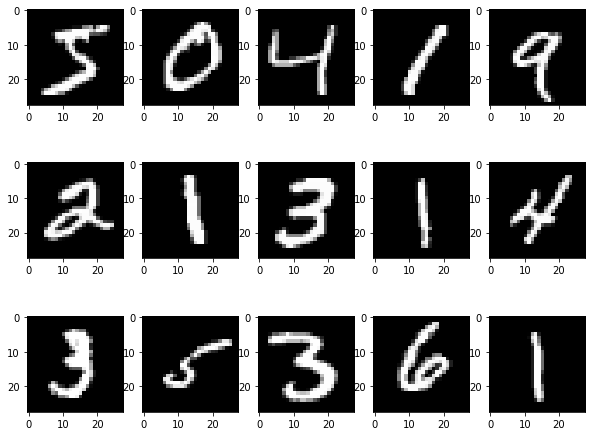

In [3]:
from keras.datasets import mnist
import matplotlib.pyplot as plt 
import seaborn
from matplotlib import rcParams
rcParams['figure.figsize'] = 10,8

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_train.shape)

fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(x_train[i], cmap='gray')

## Data preprocessing
We will do some minimal data preprocessing by:
- Reshaping the 28*28 images into a 784 dimensional vector
- Casting the pixel values (integers between 0 and 255) to floats and dividing by 255 to get numbers between 0 and 1
- Transforming the class labels (0-9) to **one-hot encodings**.

<font color='red'>Task: What would the input dimension of the network be if we had RGB images instead of grayscale ? </font>

In [6]:
import keras
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

## Build the model
<font color='red'>Task: Build a sequential model with three hidden dense layers of 128, 200 and 256 neurons each with a ReLu activation function. The output layer has a softmax activation. See https://keras.io/examples/mnist_mlp/ for an example.</font>

In [7]:
import keras
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

# 128/200/256/10 neurons and 784 inputs (pixels per image)
# relu activation function: max(0, x)
model.add(Dense(128, activation='relu', input_shape=(784,)))
model.add(Dense(200, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 200)               25800     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               51456     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                2570      
Total params: 180,306
Trainable params: 180,306
Non-trainable params: 0
_________________________________________________________________


<font color='red'>Task: Verify that this reported number of parameters is correct. How much memory would it require to store them ?</font>

In [12]:
print(784*128+128)
print(128*200+200)
print(200*256+256)
print(256*10+10)
print("cost to store all parameters:", (784*128+128 + 128*200+200 + 200*256+256 + 256*10+10)*4/1000, "kb")

100480
25800
51456
2570
cost to store all parameters: 721.224 kb


## Train the model
Keras makes it easy to train to model by providing a *fit* function just like scikit-learn does. Here we train the network for ten **epochs**. An epoch is defined as one pass through the dataset.

<font color='red'>Task: How many times are the weights updated during training ?</font>

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 26us/step - loss: 0.4993 - accuracy: 0.8506 - val_loss: 0.2259 - val_accuracy: 0.9350
Epoch 2/10
60000/60000 [==============================] - 1s 22us/step - loss: 0.1968 - accuracy: 0.9420 - val_loss: 0.1535 - val_accuracy: 0.9530
Epoch 3/10
60000/60000 [==============================] - 1s 22us/step - loss: 0.1403 - accuracy: 0.9586 - val_loss: 0.1246 - val_accuracy: 0.9614
Epoch 4/10
60000/60000 [==============================] - 1s 22us/step - loss: 0.1099 - accuracy: 0.9675 - val_loss: 0.1030 - val_accuracy: 0.9658
Epoch 5/10
60000/60000 [==============================] - 1s 21us/step - loss: 0.0904 - accuracy: 0.9729 - val_loss: 0.1013 - val_accuracy: 0.9673
Epoch 6/10
60000/60000 [==============================] - 1s 21us/step - loss: 0.0756 - accuracy: 0.9772 - val_loss: 0.0891 - val_accuracy: 0.9716
Epoch 7/10
60000/60000 [==============================] - 1s 22us/st

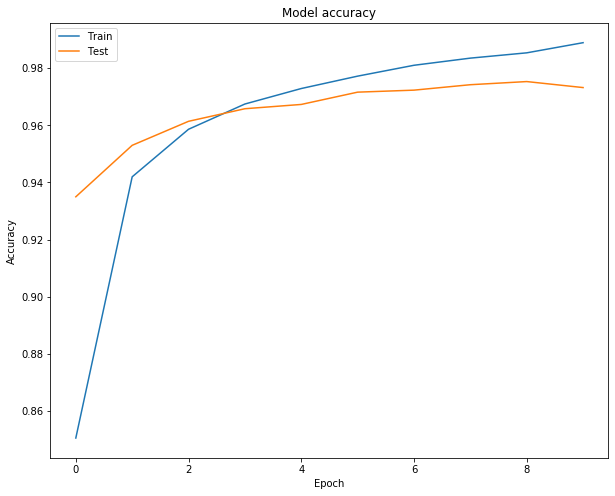

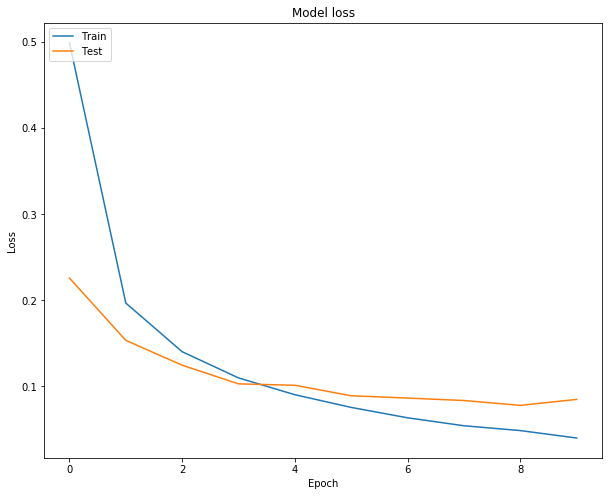

In [13]:
from keras.optimizers import SGD

batch_size = 128
epochs = 10

# SGD = stochastic gradient descent
model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.01, momentum=0.9), metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Neural networks can be tricky to tune well. They have may **hyperparameters** such as the depth and width of the network, the activation functions, the **batch size**, the **learning rate**,  the **loss function**, the **optimizer**, the preprocessing of the data, ... .In addition, training a neural network is expensive, it can take days or even weeks on high-end GPU systems. Performing a grid search is therefore not always feasible. There are some rules of thumb that you can use to set these hyperparameters but in the end it comes down to experience and trial-and-error.

<font color='red'>Task: Try different hyperparameters: Add or remove layers, increase or decrease the capacity of a layer or the batch size, try different activation functions or optimizers</font>

<font color='red'>Task: A network with 3 layers of 1024 neurons each trained with RMSProp for 20 epochs shows the training curves below. What is going on here ?</font>

This is an example of overfitting. The classifier isn't generalizing the training set anymore but rather overfitting to that trainingset.

<img style="float:left" src="images/overfitting.png"/>

## Convolutional neural networks
In the example above, we reshaped our 28x28 images into a 784 dimensional vector. MLPs require one dimensional input data. This is fine for many types of data but in the case of images we are loosing a lot of information by treating the image as a vector of independent values. Neighboring pixels are highly correlated and we should exploit this knowledge to make our network more powerful. **Convolutional neural networks** use the **convolution** operation to do this. Here we will use **2D convolutional layers** that work on **2D input** although it is also possible to use them for 1D (e.g. timeseries) and 3D  input (e.g. video).

A 2D convolutional network has a set of learned 2D **filters** or **kernels** that are moved over the 2D input using a sliding window. At each position, the filter is multiplied with the underlying pixels to get a single output value for that position. By sliding the filter over the entire input, we get a **feature map**, a **filtered** version of the input. Intuitively, you can see the filter as a **feature detector** that scans the entire image for **patches** that match the feature. A convolutional layer has multiple filters (typically 64-4096). The size of the filter is a hyperparameter but in the case of image classification it is often 3, 5 or 7. 

There are three important characteristics that help convolutional neural networks to improve the performance of a model:
- **Sparse interactions**: In a **fully connected layer**, every output value depends on every input value. Every neuron looks at the entire input. In a convolutional network we have a small filter that only looks at a small patch a t a time. This **sparse connectivity** makes the network more efficient since it needs less parameters and allows the network to focus on small parts of the image at a time.
- **Parameter sharing**: The same filter is used at every location in the image. This makes a lot of sense in the case of image recognition, a filter that detect edges for example will be useful at every location.
- **equivariant representations**: Convolutional representations are **equivariant to translation**. This means that if the input is moved to the left or to the right, then the output will also be moved accordingly. This is a very useful characteristic for image classification since it doesn't really matter if our digit is moved a few pixels to the left or to the right, the model should be able to deal with this.

In addition to convolutions and non-linearities, convolutional neural networks also include **pooling layers**. These layers are not trained but perform a fixed operation that reduces the **spatial dimensionality** of the data. The most common pooling operation: **max pooling** looks at a subset of the feature map (for example 2x2 values) and reduces this to the maximum value. This allows the filters of the next layers to work on a larger part of the original input (**the receptive field**).

<div>
<img style="float:left" src="images/conv.gif"/>
<img style="float:left, margin-left:50px" src="images/pooling.png"/>
</div>

Source: https://m-alcu.github.io/blog/2018/01/13/neural-layers/

Convolutional neural networks learn **hierarchies of features**. The first layers learn to detect basic, local features such as color transitions and edges. These are then combined by the next layers into basic shapes and finally into parts of objects.
<img style="float:left, width=450" src="images/features.png"/>

<br/>

Source: https://towardsdatascience.com/convolutional-neural-network-for-breast-cancer-classification-52f1213dcc9


We again load the MNIST data but now we don't reshape it into a single vector. The input of the model will have shape 28x28x1 where 1 represents the number of **channels**. In case of RGB images this would be 3.

In [15]:
# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)


The code below defines a convolutional network with two convolutional layers, each followed by a maxpooling operation. After the two convolutions we **flatten** the **representation** into a 1 dimensional vector and give it to a dense layer with 128 neurons followed by the output layer with 10 neurons. Intuitively, the convolutional part of the model extracts local image based features. The dense part combines all information over the entire image and uses that to do the final classification.

In [16]:
from keras.layers import Flatten
from keras.layers import Conv2D, MaxPooling2D

batch_size = 128
epochs = 10

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding="same", activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               401536    
_________________________________________________________________
dense_6 (Dense)              (None, 10)               

<font color='red'>Task: Verify that this reported number of parameters is correct. How much memory would it require to store them ?</font>

In [19]:
print(1*3*3*32+32)
print(32*3*3*64+64)
print(64*7*7*128+128)
print(128*10+10)
print("cost to store all parameters:", (1*3*3*32+32+32*3*3*64+64+64*7*7*128+128*10+10)*4/1000, "kb")

320
18496
401536
1290
cost to store all parameters: 1686.056 kb


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 24s 399us/step - loss: 0.1811 - accuracy: 0.9437 - val_loss: 0.0440 - val_accuracy: 0.9850
Epoch 2/10
60000/60000 [==============================] - 25s 413us/step - loss: 0.0470 - accuracy: 0.9853 - val_loss: 0.0367 - val_accuracy: 0.9888
Epoch 3/10
60000/60000 [==============================] - 25s 413us/step - loss: 0.0314 - accuracy: 0.9902 - val_loss: 0.0346 - val_accuracy: 0.9891
Epoch 4/10
60000/60000 [==============================] - 27s 446us/step - loss: 0.0223 - accuracy: 0.9931 - val_loss: 0.0332 - val_accuracy: 0.9902
Epoch 5/10
60000/60000 [==============================] - 28s 464us/step - loss: 0.0167 - accuracy: 0.9943 - val_loss: 0.0351 - val_accuracy: 0.9884
Epoch 6/10
60000/60000 [==============================] - 28s 466us/step - loss: 0.0127 - accuracy: 0.9962 - val_loss: 0.0288 - val_accuracy: 0.9903
Epoch 7/10
60000/60000 [==============================] 

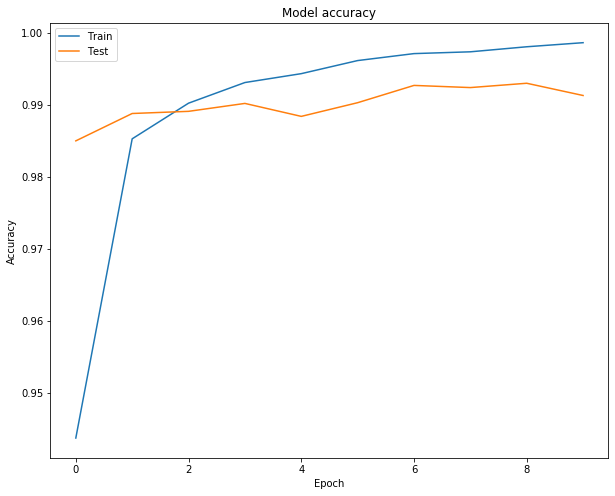

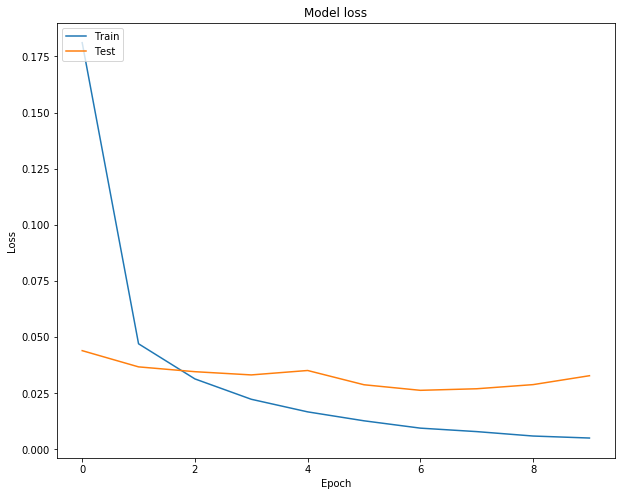

In [18]:
from keras.optimizers import RMSprop

model.compile(loss=keras.losses.categorical_crossentropy, optimizer=RMSprop(lr=0.001), metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

<font color='red'>Task: Move the model to the GPU, do you see an improvement in speed ?</font>

A GPU gives a performance improvement of a factor 40.

<font color='red'>Task: Try different hyperparameters: Add or remove layers, increase or decrease the capacity of a layer or the batch size, try different activation functions or optimizers</font>

# Remarks
- Here we looked at **supervised learning**. Neural networks can also be trained unsupervised, for example using **autoencoders**.
- Neural network benefit from (very) large datasets. It is common practice to **augment** your training data with random rotations, flips or by adding noise. You have to be careful however if the augmentation makes sense for your type of data. In the case of character recognition for example, small rotations might be a good augmentation since it forces the network to deal with slightly different handwriting styles. Vertical flips on the other hand are not a good augmentation since a flipped digit is not representative of the data anymore.
- The learning rate of the network is a very important hyperparameter. It is a good idea to reduce the learning rate after a few epochs of training as this allows the network to make smaller steps.